In [10]:
import dynet as dynet
import random
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import pickle
%run utils.ipynb
import time
%matplotlib inline

In [11]:
def train_network():
    t0 = time.time()

    we = 100
    pe = 50
    hidden = 200
    minibatch = 1000
    epochs = 20

    net_properties = NetProperties(we, pe, hidden, minibatch)
    vocab = Vocab("../data/mini/features/train.data")
    
    pickle.dump((vocab, net_properties), open("../data/mini/vocab_net.data", 'wb'))
    network = Network(vocab, net_properties)
    (loss_values, validation_accs, train_accs) = network.train("../data/mini/features/train.data", epochs, "../data/mini/features/validation.data")
    network.save("../data/mini/net.model")

    t1 = time.time()
    total = t1 - t0
    print("runtime: " + str(total))
    return (loss_values, validation_accs, train_accs)

In [12]:
(loss_values, validation_accs, train_accs) = train_network()

started epoch 1
current minibatch loss 4.303771495819092 progress: 7.18 %
current minibatch loss 4.063471794128418 progress: 14.35 %
current minibatch loss 3.9072189331054688 progress: 21.53 %
current minibatch loss 3.729982852935791 progress: 28.7 %
current minibatch loss 3.5595362186431885 progress: 35.88 %
current minibatch loss 3.4400835037231445 progress: 43.05 %
current minibatch loss 3.3728208541870117 progress: 50.23 %
current minibatch loss 3.342900276184082 progress: 57.4 %
current minibatch loss 3.22121262550354 progress: 64.58 %
current minibatch loss 3.088278293609619 progress: 71.76 %
current minibatch loss 3.1026551723480225 progress: 78.93 %
current minibatch loss 2.9733035564422607 progress: 86.11 %
current minibatch loss 2.8952298164367676 progress: 93.28 %
started epoch 2
current minibatch loss 2.859370231628418 progress: 0.72 %
current minibatch loss 2.7635791301727295 progress: 7.89 %
current minibatch loss 2.7330310344696045 progress: 15.07 %
current minibatch los

current minibatch loss 1.059350848197937 progress: 78.21 %
current minibatch loss 0.9622002243995667 progress: 85.39 %
current minibatch loss 1.0351040363311768 progress: 92.57 %
current minibatch loss 1.065725564956665 progress: 99.74 %
started epoch 11
current minibatch loss 1.0273135900497437 progress: 7.18 %
current minibatch loss 1.0439159870147705 progress: 14.35 %
current minibatch loss 1.0618202686309814 progress: 21.53 %
current minibatch loss 0.9375777840614319 progress: 28.7 %
current minibatch loss 0.9442296028137207 progress: 35.88 %
current minibatch loss 1.0038641691207886 progress: 43.05 %
current minibatch loss 1.045332431793213 progress: 50.23 %
current minibatch loss 0.927807629108429 progress: 57.4 %
current minibatch loss 0.988947331905365 progress: 64.58 %
current minibatch loss 0.9621096253395081 progress: 71.76 %
current minibatch loss 1.020331621170044 progress: 78.93 %
current minibatch loss 0.9352899789810181 progress: 86.11 %
current minibatch loss 0.9602591

current minibatch loss 0.5938225388526917 progress: 49.51 %
current minibatch loss 0.6832154393196106 progress: 56.69 %
current minibatch loss 0.6705734133720398 progress: 63.86 %
current minibatch loss 0.6510806679725647 progress: 71.04 %
current minibatch loss 0.6682707071304321 progress: 78.21 %
current minibatch loss 0.6429315209388733 progress: 85.39 %
current minibatch loss 0.6230663657188416 progress: 92.57 %
current minibatch loss 0.635049045085907 progress: 99.74 %
runtime: 4010.973364830017


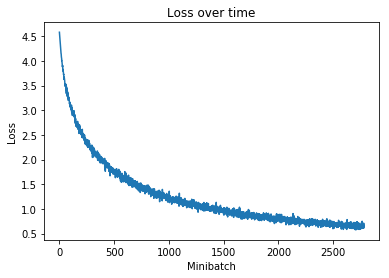

In [16]:
plt.title("Loss over time")
plt.xlabel("Minibatch")
plt.ylabel("Loss")
plt.plot(*zip(*loss_values))

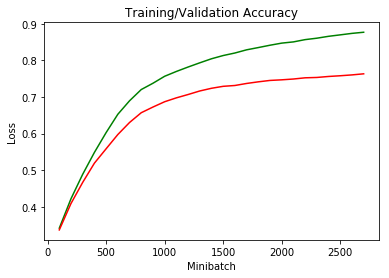

In [18]:
plt.title("Training/Validation Accuracy")
plt.xlabel("Minibatch")
plt.ylabel("Loss")
x, y = zip(*train_accs)
plt.plot(x, y, 'g')

x1, y1 = zip(*validation_accs)
plt.plot(x1, y1, 'r')

In [15]:
# 20 epochs, small dataset, 0.005 learning rate